In [5]:
!pip install clevercsv

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import clevercsv

In [7]:
df = clevercsv.read_dataframe('/content/heart_2020_cleaned.csv')

In [8]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [9]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### **exploratory data analysis**



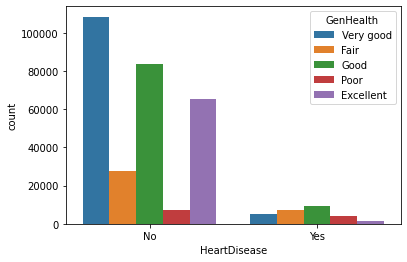

In [12]:
sns.countplot(hue='GenHealth',x='HeartDisease',data =df)

In [13]:
df.groupby(['GenHealth','HeartDisease']).count()

BMI  Smoking  AlcoholDrinking  Stroke  \
GenHealth HeartDisease                                             
Excellent No             65342    65342            65342   65342   
          Yes             1500     1500             1500    1500   
Fair      No             27593    27593            27593   27593   
          Yes             7084     7084             7084    7084   
Good      No             83571    83571            83571   83571   
          Yes             9558     9558             9558    9558   
Poor      No              7439     7439             7439    7439   
          Yes             3850     3850             3850    3850   
Very good No            108477   108477           108477  108477   
          Yes             5381     5381             5381    5381   

                        PhysicalHealth  MentalHealth  DiffWalking     Sex  \
GenHealth HeartDisease                                                      
Excellent No                     65342         65342        65342   65342   
          Yes                     1500          1500         1500    1500   
Fair      No                     27593         27593        27593   27593   
          Yes                     7084          7084         7084    7084   
Good      No                     83571         83571        83571   83571   
          Yes                     9558          9558         9558    9558   
Poor      No                      7439          7439         7439    7439   
          Yes                     3850          3850         3850    3850   
Very good No                    108477        108477       108477  108477   
          Yes                     5381          5381         5381    5381   

                        AgeCategory    Race  Diabetic  PhysicalActivity  \
GenHealth HeartDisease                                                    
Excellent No                  65342   65342     65342             65342   
          Yes                  1500    1500      1500              1500   
Fair      No                  27593   27593     27593             27593   
          Yes                  7084    7084      7084              7084   
Good      No                  83571   83571     83571             83571   
          Yes                  9558    9558      9558              9558   
Poor      No                   7439    7439      7439              7439   
          Yes                  3850    3850      3850              3850   
Very good No                 108477  108477    108477            108477   
          Yes                  5381    5381      5381              5381   

                        SleepTime  Asthma  KidneyDisease  SkinCancer  
GenHealth HeartDisease                                                
Excellent No                65342   65342          65342       65342  
          Yes                1500    1500           1500        1500  
Fair      No                27593   27593          27593       27593  
          Yes                7084    7084           7084        7084  
Good      No                83571   83571          83571       83571  
          Yes                9558    9558           9558        9558  
Poor      No                 7439    7439           7439        7439  
          Yes                3850    3850           3850        3850  
Very good No               108477  108477         108477      108477  
          Yes                5381    5381           5381        5381

GenHealth column seems to be a good metric to help predict heartdisease

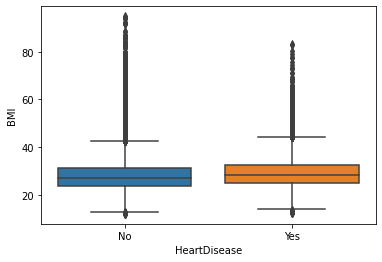

In [14]:
sns.boxplot(x='HeartDisease',y='BMI',data =df)

Lots of outliers, it also looks like the BMI doesnt have much of a relevant effect on HeartDisease

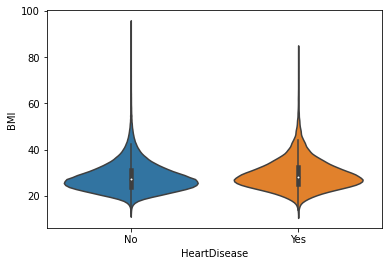

In [15]:
sns.violinplot(x='HeartDisease',y='BMI',data =df)

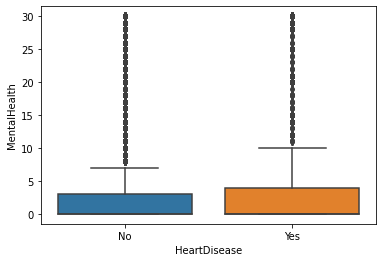

In [16]:
sns.boxplot(y='MentalHealth',x='HeartDisease',data =df)

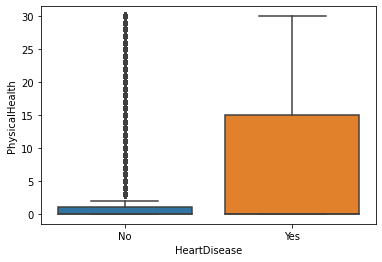

In [17]:
sns.boxplot(y='PhysicalHealth',x='HeartDisease',data =df)

In [18]:
display(df['PhysicalHealth'].value_counts().sort_values(ascending=True))

19.0        35
23.0        46
26.0        66
24.0        67
11.0        85
22.0        89
13.0        91
17.0       110
27.0       124
16.0       135
18.0       167
9.0        180
29.0       204
28.0       446
12.0       605
21.0       626
8.0        924
25.0      1164
6.0       1270
14.0      2893
20.0      3216
4.0       4468
7.0       4629
15.0      5012
10.0      5453
5.0       7606
3.0       8617
1.0      10489
2.0      14880
30.0     19509
0.0     226589
Name: PhysicalHealth, dtype: int64

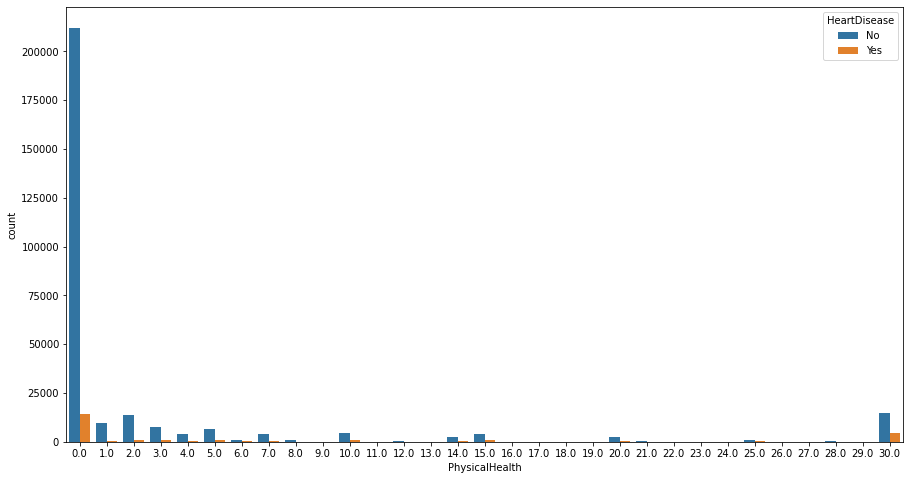

In [19]:
sns.countplot(x='PhysicalHealth',data=df,hue='HeartDisease')
plt.gcf().set_size_inches(15, 8)

In [20]:
df[df['PhysicalHealth']==0]['HeartDisease'].value_counts()

No     212167
Yes     14422
Name: HeartDisease, dtype: int64

So from this, we infer that value 0 represents missing data, as almost 70% data is missing in this column, it is probably a good idea to drop it.

In [21]:
display(df['MentalHealth'].value_counts().sort_values(ascending=True))

19.0        21
26.0        59
24.0        67
23.0        68
11.0        83
22.0        98
13.0       110
27.0       126
17.0       128
16.0       152
9.0        203
18.0       211
29.0       317
21.0       352
28.0       515
12.0       757
8.0       1094
6.0       1510
25.0      1954
14.0      2048
4.0       5379
20.0      5431
7.0       5528
1.0       9291
15.0      9896
3.0      10466
10.0     10513
5.0      14149
2.0      16495
30.0     17373
0.0     205401
Name: MentalHealth, dtype: int64

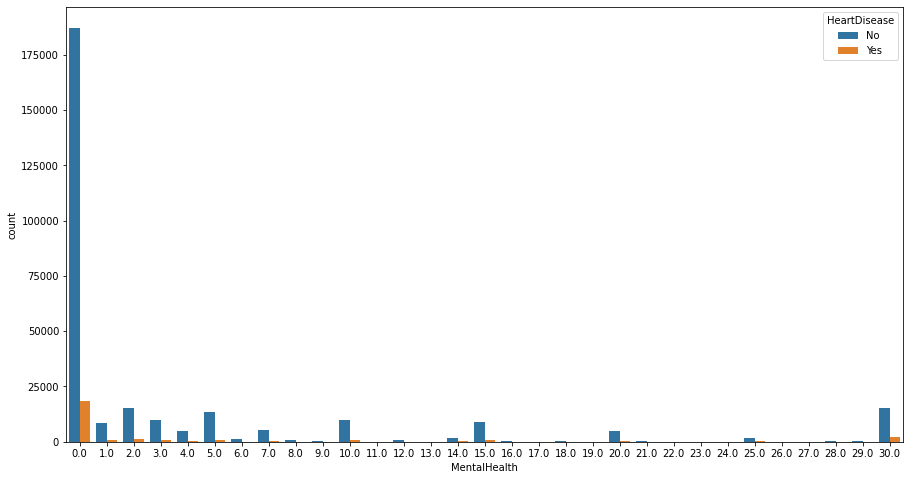

In [22]:
sns.countplot(x='MentalHealth',data=df,hue='HeartDisease')
plt.gcf().set_size_inches(15, 8)

In [23]:
df[df['MentalHealth']==0]['HeartDisease'].value_counts()

No     187186
Yes     18215
Name: HeartDisease, dtype: int64

So from this, we infer that value 0 represents missing data, as almost 70% data is missing in this column, it is probably a good idea to drop it.

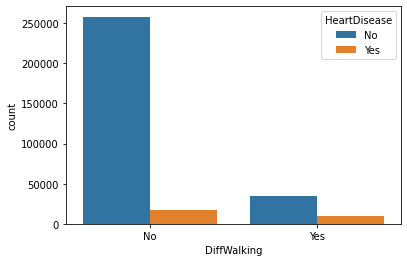

In [24]:
sns.countplot(x='DiffWalking',hue='HeartDisease',data = df)

In [25]:
df[df['DiffWalking']=='Yes']['HeartDisease'].value_counts()

No     34382
Yes    10028
Name: HeartDisease, dtype: int64

Almost 23% of people who have difficulty walking, have heart disease.

In [26]:
df[df['DiffWalking']=='Yes']['BMI'].describe()

count    44410.000000
mean        31.200961
std          8.107662
min         12.080000
25%         25.690000
50%         29.950000
75%         35.430000
max         93.970000
Name: BMI, dtype: float64

In [27]:
df[df['BMI']<20]['HeartDisease'].value_counts()

No     13670
Yes      963
Name: HeartDisease, dtype: int64

For most ranges of BMI selected which excludes the outliers, around only 10% of that selected population is affected by HeartDisease. This leads us to believe that maybe BMI is not a strong enough metric to verify if heart disease is present or not

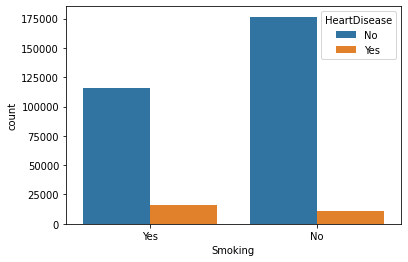

In [28]:
sns.countplot(x='Smoking',hue='HeartDisease',data = df)

In [29]:
df[df['Smoking']=='Yes']['HeartDisease'].value_counts()

No     115871
Yes     16037
Name: HeartDisease, dtype: int64

In [30]:
df[df['Smoking']=='No']['HeartDisease'].value_counts()

No     176551
Yes     11336
Name: HeartDisease, dtype: int64

So from this we see that 12% of smokers are associated with heart disease and 6% non smokers are associated with heart disease

In [31]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


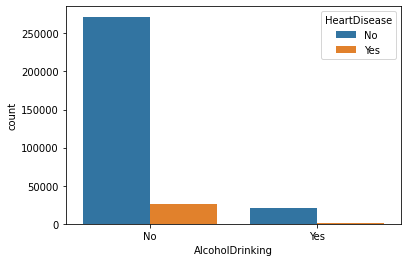

In [32]:
sns.countplot(x='AlcoholDrinking',hue='HeartDisease',data = df)

In [33]:
df[df['AlcoholDrinking']=='Yes']['HeartDisease'].value_counts()

No     20636
Yes     1141
Name: HeartDisease, dtype: int64

In [34]:
df[df['AlcoholDrinking']=='No']['HeartDisease'].value_counts()

No     271786
Yes     26232
Name: HeartDisease, dtype: int64

So from this we see that 5.2% of alcohol consumers are associated with heart disease and 9% non alcohol consumers are associated with heart disease, this leads us to believe that alcohol consumption may not have much of an effect on heart disease

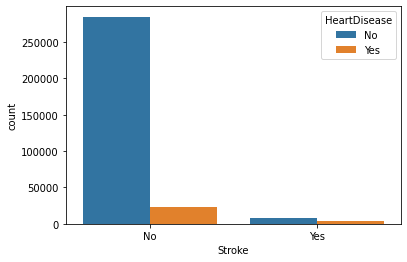

In [35]:
sns.countplot(x='Stroke',hue='HeartDisease',data=df)

In [36]:
df[df['Stroke']=='No']['HeartDisease'].value_counts()

No     284742
Yes     22984
Name: HeartDisease, dtype: int64

In [37]:
df[df['Stroke']=='Yes']['HeartDisease'].value_counts()

No     7680
Yes    4389
Name: HeartDisease, dtype: int64

Around 36% of people who had a stroke has heartdisease, and only 8% who didnt have a stroke had heartdisease showing strong correlation

In [38]:
df['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

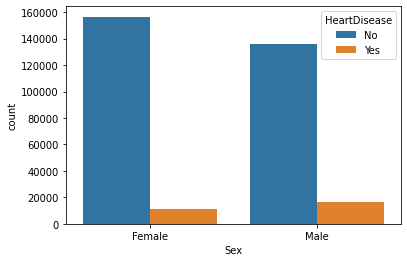

In [39]:
sns.countplot(x='Sex',hue='HeartDisease',data =df)

In [40]:
df[df['Sex']=='Male']['HeartDisease'].value_counts()

No     135851
Yes     16139
Name: HeartDisease, dtype: int64

11.4% of males get HeartDisease

In [41]:
df[df['Sex']=='Female']['HeartDisease'].value_counts()

No     156571
Yes     11234
Name: HeartDisease, dtype: int64

7.2% of females get heartdisease

In [42]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [43]:
df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

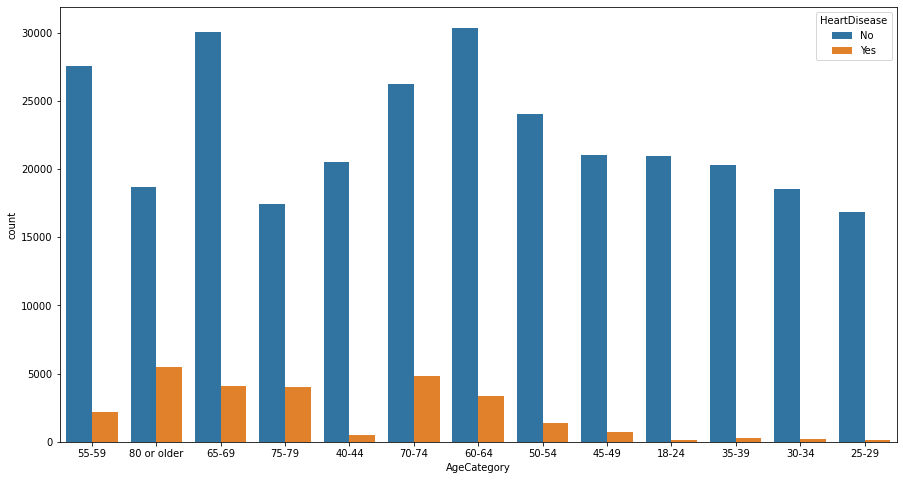

In [44]:
sns.countplot(x='AgeCategory',hue='HeartDisease',data=df)
plt.gcf().set_size_inches(15, 8)

In [45]:
df['AgeCategory'].unique().tolist()

['55-59',
 '80 or older',
 '65-69',
 '75-79',
 '40-44',
 '70-74',
 '60-64',
 '50-54',
 '45-49',
 '18-24',
 '35-39',
 '30-34',
 '25-29']

In [46]:
AgeRangeRates = {}
lis = df['AgeCategory'].unique().tolist()
for category in lis:
  ser = df[df['AgeCategory']==category]['HeartDisease'].value_counts()
  percentage = (ser['Yes']/ser.sum())*100
  AgeRangeRates[category] = "{:.2f}".format(percentage)+"%"
  print('Percentage of people who has heart disease in age category {} is {}'.format(category,"{:.2f}".format(percentage)))

Percentage of people who has heart disease in age category 55-59 is 7.40
Percentage of people who has heart disease in age category 80 or older is 22.56
Percentage of people who has heart disease in age category 65-69 is 12.01
Percentage of people who has heart disease in age category 75-79 is 18.85
Percentage of people who has heart disease in age category 40-44 is 2.31
Percentage of people who has heart disease in age category 70-74 is 15.60
Percentage of people who has heart disease in age category 60-64 is 9.88
Percentage of people who has heart disease in age category 50-54 is 5.45
Percentage of people who has heart disease in age category 45-49 is 3.41
Percentage of people who has heart disease in age category 18-24 is 0.62
Percentage of people who has heart disease in age category 35-39 is 1.44
Percentage of people who has heart disease in age category 30-34 is 1.21
Percentage of people who has heart disease in age category 25-29 is 0.78


In [47]:
AgeRangeRates

{'18-24': '0.62%',
 '25-29': '0.78%',
 '30-34': '1.21%',
 '35-39': '1.44%',
 '40-44': '2.31%',
 '45-49': '3.41%',
 '50-54': '5.45%',
 '55-59': '7.40%',
 '60-64': '9.88%',
 '65-69': '12.01%',
 '70-74': '15.60%',
 '75-79': '18.85%',
 '80 or older': '22.56%'}

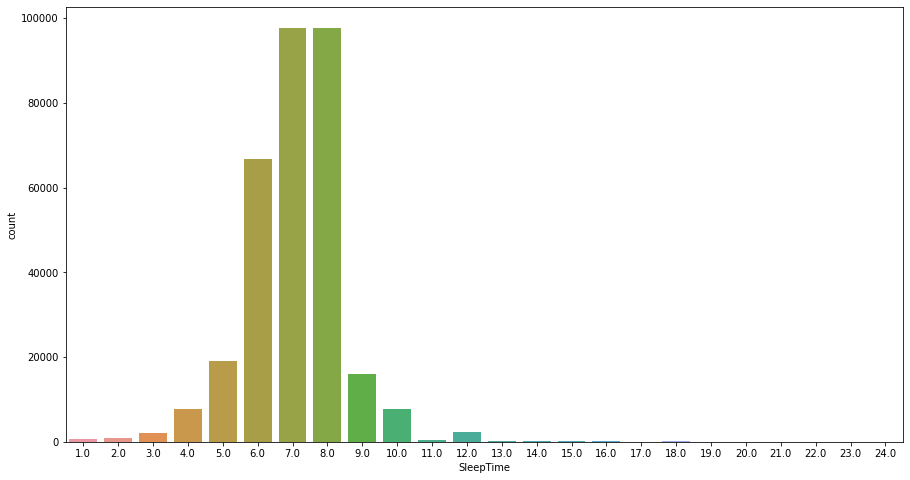

In [49]:
sns.countplot(x='SleepTime',data = df)
plt.gcf().set_size_inches(15, 8)

In [50]:
df['SleepTime'].value_counts().sort_index(ascending = True)

1.0       551
2.0       788
3.0      1992
4.0      7750
5.0     19184
6.0     66721
7.0     97751
8.0     97602
9.0     16041
10.0     7796
11.0      415
12.0     2205
13.0       97
14.0      243
15.0      189
16.0      236
17.0       21
18.0      102
19.0        3
20.0       64
21.0        2
22.0        9
23.0        3
24.0       30
Name: SleepTime, dtype: int64

In [51]:
df[df['SleepTime']==13]['HeartDisease'].value_counts()

No     79
Yes    18
Name: HeartDisease, dtype: int64

In [52]:
lis = []
for i in range(1,21):
  val = df[df['SleepTime']==i]['HeartDisease'].value_counts()[1]/(df[df['SleepTime']==i]['HeartDisease'].value_counts()[1]+df[df['SleepTime']==i]['HeartDisease'].value_counts()[0])
  print('Risk of heart disease for hours = ',i,'is',"{:.2f}".format(val*100)+'%')
  lis.append(val)
sleephours =  pd.DataFrame({'Risk of heart disease': lis}, 
                      index=pd.RangeIndex(start=1, stop=21, name='Sleep Hours')
                     )

Risk of heart disease for hours =  1 is 10.89%
Risk of heart disease for hours =  2 is 16.24%
Risk of heart disease for hours =  3 is 17.42%
Risk of heart disease for hours =  4 is 15.23%
Risk of heart disease for hours =  5 is 10.58%
Risk of heart disease for hours =  6 is 8.13%
Risk of heart disease for hours =  7 is 6.47%
Risk of heart disease for hours =  8 is 8.56%
Risk of heart disease for hours =  9 is 10.57%
Risk of heart disease for hours =  10 is 14.94%
Risk of heart disease for hours =  11 is 17.59%
Risk of heart disease for hours =  12 is 18.87%
Risk of heart disease for hours =  13 is 18.56%
Risk of heart disease for hours =  14 is 17.70%
Risk of heart disease for hours =  15 is 12.70%
Risk of heart disease for hours =  16 is 14.41%
Risk of heart disease for hours =  17 is 9.52%
Risk of heart disease for hours =  18 is 20.59%
Risk of heart disease for hours =  19 is 33.33%
Risk of heart disease for hours =  20 is 25.00%


No consistency or trend visible, higher values of sleephours is also very low in number compared to rest. 

In [53]:
sleephours

,Risk of heart disease
Sleep Hours,
1,0.108893
2,0.162437
3,0.174197
4,0.152258
5,0.105817
6,0.081339
7,0.064705
8,0.085633
9,0.105729


Dropping rows with 20+ as it doesnt seem consistent enough to keep in the dataset

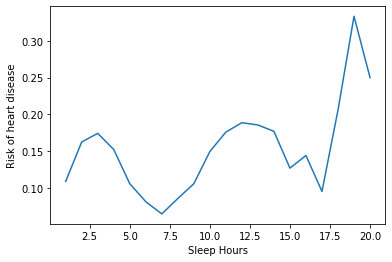

In [54]:
sns.lineplot(x=sleephours.index,y='Risk of heart disease',data = sleephours)

Data is very sporadic, not reliable

In [56]:
df.groupby(['Race'])['HeartDisease'].value_counts()

Race                            HeartDisease
American Indian/Alaskan Native  No                4660
                                Yes                542
Asian                           No                7802
                                Yes                266
Black                           No               21210
                                Yes               1729
Hispanic                        No               26003
                                Yes               1443
Other                           No               10042
                                Yes                886
White                           No              222705
                                Yes              22507
Name: HeartDisease, dtype: int64

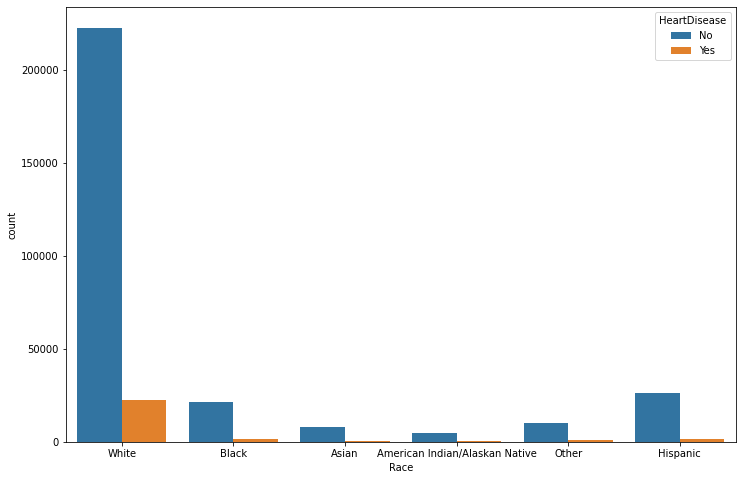

In [57]:
sns.countplot(x='Race',hue='HeartDisease',data =df)
plt.gcf().set_size_inches(12, 8)

In [59]:
df['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [60]:
ser = df['Diabetic'].value_counts()
for index, value in ser.items():
  s = df[df['Diabetic']==index]['HeartDisease'].value_counts()
  s = (s[1]/(s[0]+s[1]))*100
  print('risk of heartdisease for ',index, ' is ', "{:.2f}".format(s)+"%")

risk of heartdisease for  No  is  6.50%
risk of heartdisease for  Yes  is  21.95%
risk of heartdisease for  No, borderline diabetes  is  11.64%
risk of heartdisease for  Yes (during pregnancy)  is  4.22%


In [61]:
df[df['Diabetic']=='Yes (during pregnancy)']

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
237,No,22.22,No,No,No,0.0,2.0,No,Female,55-59,Black,Yes (during pregnancy),Yes,Good,9.0,No,No,No
732,No,28.53,Yes,No,No,20.0,15.0,No,Female,60-64,White,Yes (during pregnancy),Yes,Good,9.0,No,No,No
1016,No,32.77,No,No,No,0.0,25.0,No,Female,40-44,Other,Yes (during pregnancy),Yes,Good,8.0,Yes,No,No
1103,No,47.83,No,No,No,0.0,30.0,No,Female,50-54,White,Yes (during pregnancy),No,Good,6.0,No,No,No
1226,No,23.44,No,No,No,0.0,5.0,No,Female,45-49,White,Yes (during pregnancy),Yes,Excellent,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318771,No,33.20,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,Yes (during pregnancy),No,Good,8.0,No,No,No
318995,No,23.87,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes (during pregnancy),No,Good,7.0,No,No,No
319143,No,33.09,No,No,No,0.0,4.0,No,Female,30-34,Hispanic,Yes (during pregnancy),Yes,Good,5.0,No,No,No
319386,No,24.45,No,No,No,0.0,0.0,No,Female,35-39,Hispanic,Yes (during pregnancy),Yes,Excellent,8.0,No,No,No


In [62]:
df["Diabetic"].replace("Yes (during pregnancy)", "No",inplace = True)

Since the risk of heartdisease is almost same

In [63]:
df['Diabetic'].value_counts()

No                         272212
Yes                         40802
No, borderline diabetes      6781
Name: Diabetic, dtype: int64

In [65]:
df['Asthma'].value_counts()

No     276923
Yes     42872
Name: Asthma, dtype: int64

In [66]:
ser = df['Asthma'].value_counts()
for index, value in ser.items():
  s = df[df['Asthma']==index]['HeartDisease'].value_counts()
  s = s[1]/(s[0]+s[1])*100
  print('risk of heartdisease for ',index, ' is ', "{:.2f}".format(s)+"%")

risk of heartdisease for  No  is  8.10%
risk of heartdisease for  Yes  is  11.51%


Very small difference, might not be useful

In [67]:
df['KidneyDisease'].value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

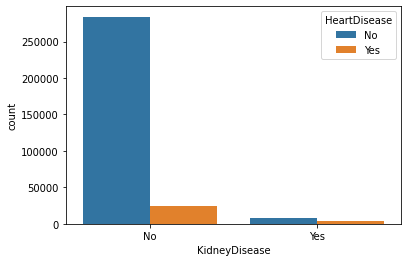

In [68]:
sns.countplot(x='KidneyDisease',hue = 'HeartDisease',data = df)

Decent correlation between having kidneydisease and having heartdisease

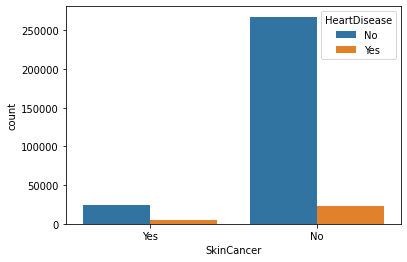

In [69]:
sns.countplot(x='SkinCancer',hue = 'HeartDisease',data = df)

In [70]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### **Dropping of columns and Encoding categorical data**

In [72]:
df = df.drop(['BMI','PhysicalHealth','MentalHealth','SleepTime'],axis=1)

In [74]:
df['GeneralHealth'] = df['GenHealth'].apply(lambda x: ['Poor', 'Fair', 'Good', 'Very good','Excellent'].index(x))

Lable Encoding 

In [75]:
df['GeneralHealth'].value_counts()

3    113858
2     93129
4     66842
1     34677
0     11289
Name: GeneralHealth, dtype: int64

In [76]:
df['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [77]:
df = df.drop(['GenHealth'],axis=1)

In [78]:
# encoding of yes/no categories #

In [79]:
df['heartdisease'] = df['HeartDisease'].apply(lambda x: ['No', 'Yes'].index(x))

In [80]:
df = df.drop(['HeartDisease'],axis=1)

In [81]:
df['sex'] = df['Sex'].apply(lambda x: ['Female', 'Male'].index(x))
df['DifficultyWalking'] = df['DiffWalking'].apply(lambda x: ['No', 'Yes'].index(x))
df['smoking'] = df['Smoking'].apply(lambda x: ['No', 'Yes'].index(x))
df['alcoholdrinking'] = df['AlcoholDrinking'].apply(lambda x: ['No', 'Yes'].index(x))
df['stroke'] = df['Stroke'].apply(lambda x: ['No', 'Yes'].index(x))
df['diabetic'] = df['Diabetic'].apply(lambda x: ['No','No, borderline diabetes','Yes'].index(x))
df['asthma'] = df['Asthma'].apply(lambda x: ['No', 'Yes'].index(x))
df['kidneydisease'] = df['KidneyDisease'].apply(lambda x: ['No', 'Yes'].index(x))
df['skincancer'] = df['SkinCancer'].apply(lambda x: ['No', 'Yes'].index(x))
df['physicalactivity'] = df['PhysicalActivity'].apply(lambda x: ['No', 'Yes'].index(x))

In [82]:
df = df.drop(['Sex','DiffWalking','Smoking','AlcoholDrinking','Stroke','Diabetic','Asthma','KidneyDisease','SkinCancer','PhysicalActivity',],axis=1)

In [83]:
df.head()

,AgeCategory,Race,GeneralHealth,heartdisease,sex,DifficultyWalking,smoking,alcoholdrinking,stroke,diabetic,asthma,kidneydisease,skincancer,physicalactivity
0,55-59,White,3,0,0,0,1,0,0,2,1,0,1,1
1,80 or older,White,3,0,0,0,0,0,1,0,0,0,0,1
2,65-69,White,1,0,1,0,1,0,0,2,1,0,0,1
3,75-79,White,2,0,0,0,0,0,0,0,0,0,1,0
4,40-44,White,3,0,0,1,0,0,0,0,0,0,0,1


In [84]:
final_df=df.copy()

In [85]:
def creating_dummies(columns):
    df_final=final_df
    i=0
    for fields in columns:        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [86]:
final_df = creating_dummies(['AgeCategory','Race'])

AgeCategory
Race


In [87]:
final_df.head()

,GeneralHealth,heartdisease,sex,DifficultyWalking,smoking,alcoholdrinking,stroke,diabetic,asthma,kidneydisease,...,60-64,65-69,70-74,75-79,80 or older,Asian,Black,Hispanic,Other,White
0,3,0,0,0,1,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,1
1,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,1,0,1,0,0,2,1,0,...,0,1,0,0,0,0,0,0,0,1
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [89]:
## Independant and dependant feature split  ##
X=final_df.drop('heartdisease',axis=1)
y=final_df['heartdisease']

In [90]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [91]:
# RANDOM FOREST CLASSIFIER  #

In [92]:
# with defualt parameters #
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[86161  1488]
 [ 7292   998]]
0.9084835155671833
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87649
           1       0.40      0.12      0.19      8290

    accuracy                           0.91     95939
   macro avg       0.66      0.55      0.57     95939
weighted avg       0.88      0.91      0.89     95939



In [93]:
## using randomised search cv ##
'''
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(10,1000,10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [3,5,7,9,11]
min_samples_leaf = [2, 4,6,8,10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
'''

In [94]:
'''rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=2,verbose=2,
                               random_state=42,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)'''

'rf=RandomForestClassifier()\nrf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=2,verbose=2,\n                               random_state=42,n_jobs=-1)\nrf_randomcv.fit(X_train,y_train)'

In [95]:
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[86161  1488]
 [ 7292   998]]
0.9084835155671833
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     87649
           1       0.40      0.12      0.19      8290

    accuracy                           0.91     95939
   macro avg       0.66      0.55      0.57     95939
weighted avg       0.88      0.91      0.89     95939



In [96]:
#THE DATA IS GIVING US A 90% ACCURACY, BUT THIS IS MISLEADING AS OUR DATASET IS EXTREMELY UNBALANCED#
y.value_counts()

0    292422
1     27373
Name: heartdisease, dtype: int64

## **The model is biased towards no heartdisease so therefore gives no heartdisease to most values**
# So now we are going to try undersampling and oversampling and seeing which gives us better results **bold text**

In [97]:
# UNDER SAMPLING #
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_resampled,y_resampled=under_sampler.fit_resample(X,y)

In [98]:
y_resampled.value_counts()

0    27373
1    27373
Name: heartdisease, dtype: int64

Now our data is balanced

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

In [100]:
## using randomised search cv ##
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(10,1000,10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [3,5,7,9,11]
min_samples_leaf = [2, 4,6,8,10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

In [101]:
'''
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=2,verbose=2,
                               random_state=42,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)'''

'\nrf=RandomForestClassifier()\nrf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=2,verbose=2,\n                               random_state=42,n_jobs=-1)\nrf_randomcv.fit(X_train,y_train)'

This is a more realistic result 

In [103]:
# OVER SAMPLING #
'''
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X_resampled,y_resampled=smk.fit_resample(X,y)
X_resampled.to_csv(r'/content/X.csv')
y_resampled.to_csv(r'/content/y.csv')'''

"\nfrom imblearn.combine import SMOTETomek\nsmk = SMOTETomek()\nX_resampled,y_resampled=smk.fit_resample(X,y)\nX_resampled.to_csv(r'/content/X.csv')\ny_resampled.to_csv(r'/content/y.csv')"

Resampled Data has been downloaded for later usage

In [104]:
X_resampled = clevercsv.read_dataframe('/content/X.csv')
y_resampled = clevercsv.read_dataframe('/content/y.csv')

In [114]:
#X_resampled = X_resampled.drop('Unnamed: 0',axis = 1)
#y_resampled = y_resampled.drop('Unnamed: 0',axis = 1)
y_resampled.value_counts()

heartdisease
0               292341
1               292341
dtype: int64

Data is BALANCED

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

In [116]:
rf_classifier=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [117]:
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[65969 21580]
 [14057 73799]]
0.796830192981956
              precision    recall  f1-score   support

           0       0.82      0.75      0.79     87549
           1       0.77      0.84      0.81     87856

    accuracy                           0.80    175405
   macro avg       0.80      0.80      0.80    175405
weighted avg       0.80      0.80      0.80    175405



In [143]:
import pickle
pickle.dump(rf_classifier,open('model.pkl','wb'))